# Zaynb Alkhafadi

## BIKES!!
the differences between casual and registered users 

In [ ]:
#import
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

#creating dataframe from URL, and storing it as an object 'df'
df = pd.read_csv('../data/raw/Bike-Sharing-Dataset/hour.csv')

print(df.to_string()) 

       instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   atemp   hum  windspeed  casual  registered  cnt
0            1  2011-01-01       1   0     1   0        0        6           0           1  0.24  0.2879  0.81     0.0000       3          13   16
1            2  2011-01-01       1   0     1   1        0        6           0           1  0.22  0.2727  0.80     0.0000       8          32   40
2            3  2011-01-01       1   0     1   2        0        6           0           1  0.22  0.2727  0.80     0.0000       5          27   32
3            4  2011-01-01       1   0     1   3        0        6           0           1  0.24  0.2879  0.75     0.0000       3          10   13
4            5  2011-01-01       1   0     1   4        0        6           0           1  0.24  0.2879  0.75     0.0000       0           1    1
5            6  2011-01-01       1   0     1   5        0        6           0           2  0.24  0.2576  0.75     0.0

In [ ]:
#involve at least two columns 

#first, what coloumns do we even have
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
#now lets get at least two columns: hrs, workingday, casual, registered
df["hr"]

0         0
1         1
2         2
3         3
4         4
         ..
17374    19
17375    20
17376    21
17377    22
17378    23
Name: hr, Length: 17379, dtype: int64

In [ ]:
df["weekday"]

0        6
1        6
2        6
3        6
4        6
        ..
17374    1
17375    1
17376    1
17377    1
17378    1
Name: weekday, Length: 17379, dtype: int64

In [ ]:
df["casual"]

0         3
1         8
2         5
3         3
4         0
         ..
17374    11
17375     8
17376     7
17377    13
17378    12
Name: casual, Length: 17379, dtype: int64

In [ ]:
df["registered"]

0         13
1         32
2         27
3         10
4          1
        ... 
17374    108
17375     81
17376     83
17377     48
17378     37
Name: registered, Length: 17379, dtype: int64

<AxesSubplot:xlabel='weekday', ylabel='casual'>

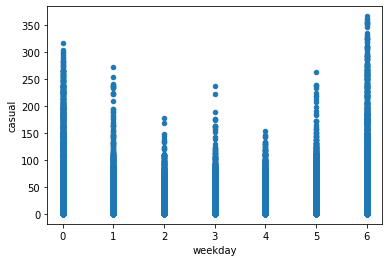

In [ ]:
df.plot(kind='scatter', x='weekday', y='casual')

<AxesSubplot:>

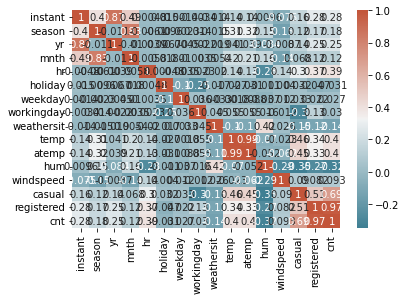

In [ ]:
# plot the heatmap (correlation matrix)
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


<seaborn.axisgrid.PairGrid>

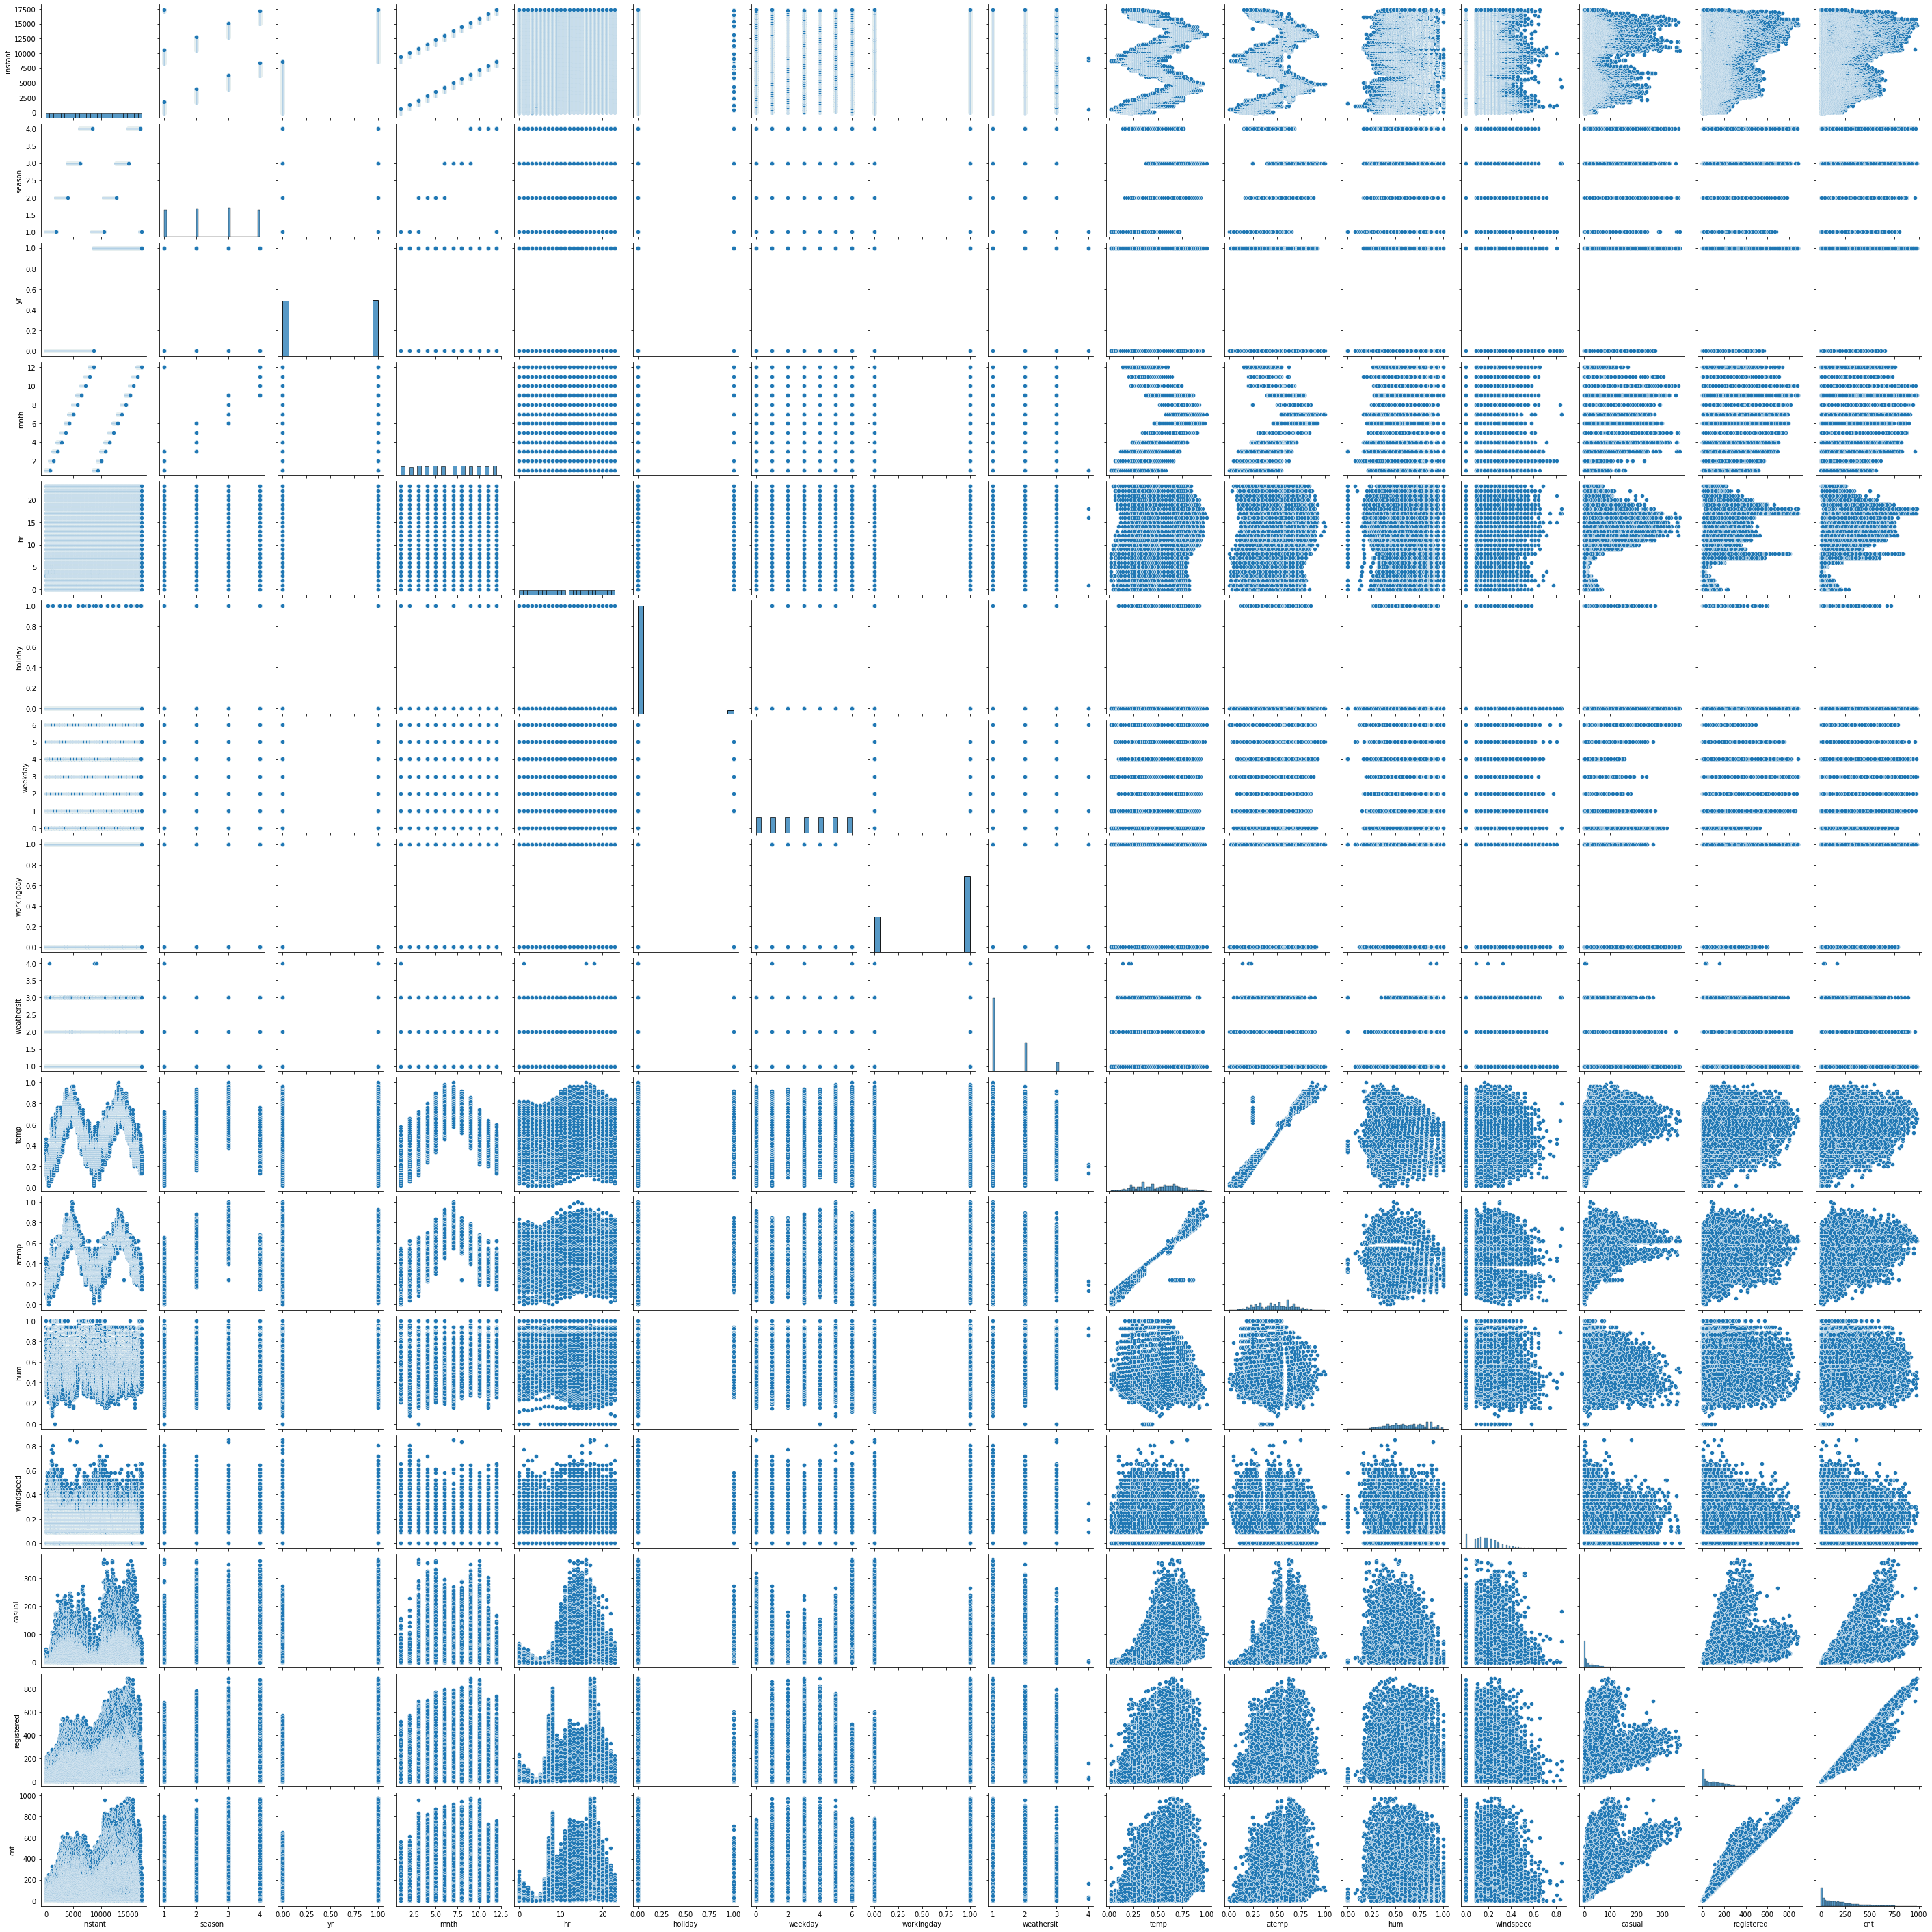

In [ ]:
sns.pairplot(df)

In [ ]:
df.nunique(axis=0)

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [ ]:
df.describe()

season            hr       holiday    workingday    weathersit  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640     11.546752      0.028770      0.682721      1.425283   
std        1.106918      6.914405      0.167165      0.465431      0.639357   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        2.000000      6.000000      0.000000      0.000000      1.000000   
50%        3.000000     12.000000      0.000000      1.000000      1.000000   
75%        3.000000     18.000000      0.000000      1.000000      2.000000   
max        4.000000     23.000000      1.000000      1.000000      4.000000   

               temp         atemp           hum     windspeed        casual  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.496987      0.475775      0.627229      0.190098     35.676218   
std        0.192556      0.171850      0.192930      0.122340     49.305030   
min        0.020000      0.000000      0.000000      0.000000      0.000000   
25%        0.340000      0.333300      0.480000      0.104500      4.000000   
50%        0.500000      0.484800      0.630000      0.194000     17.000000   
75%        0.660000      0.621200      0.780000      0.253700     48.000000   
max        1.000000      1.000000      1.000000      0.850700    367.000000   

         registered           cnt  
count  17379.000000  17379.000000  
mean     153.786869    189.463088  
std      151.357286    181.387599  
min        0.000000      1.000000  
25%       34.000000     40.000000  
50%      115.000000    142.000000  
75%      220.000000    281.000000  
max      886.000000    977.000000

In [ ]:
df.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [ ]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")


No duplicated entries found


In [ ]:
#remove columns not being used
df = df.drop(['instant', 'yr', 'mnth'], axis=1)

KeyError: "['instant', 'yr', 'mnth'] not found in axis"

In [ ]:
#drop null values
df = df.dropna(axis=0)
display(df)

dteday  season  hr  holiday weekday  workingday  weathersit  temp  \
0      2011-01-01       1   0        0       6           0           1  0.24   
1      2011-01-01       1   1        0       6           0           1  0.22   
2      2011-01-01       1   2        0       6           0           1  0.22   
3      2011-01-01       1   3        0       6           0           1  0.24   
4      2011-01-01       1   4        0       6           0           1  0.24   
...           ...     ...  ..      ...     ...         ...         ...   ...   
17374  2012-12-31       1  19        0       1           1           2  0.26   
17375  2012-12-31       1  20        0       1           1           2  0.26   
17376  2012-12-31       1  21        0       1           1           1  0.26   
17377  2012-12-31       1  22        0       1           1           1  0.26   
17378  2012-12-31       1  23        0       1           1           1  0.26   

        atemp   hum  windspeed  casual  registered  cnt  
0      0.2879  0.81     0.0000       3          13   16  
1      0.2727  0.80     0.0000       8          32   40  
2      0.2727  0.80     0.0000       5          27   32  
3      0.2879  0.75     0.0000       3          10   13  
4      0.2879  0.75     0.0000       0           1    1  
...       ...   ...        ...     ...         ...  ...  
17374  0.2576  0.60     0.1642      11         108  119  
17375  0.2576  0.60     0.1642       8          81   89  
17376  0.2576  0.60     0.1642       7          83   90  
17377  0.2727  0.56     0.1343      13          48   61  
17378  0.2727  0.65     0.1343      12          37   49  

[17379 rows x 14 columns]

In [ ]:
new_column_order =['dteday', 'hr', 'cnt', 'casual', 'registered', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum']
df = df[new_column_order]
display(df)

dteday  hr  cnt  casual  registered  season  holiday weekday  \
0      2011-01-01   0   16       3          13       1        0       6   
1      2011-01-01   1   40       8          32       1        0       6   
2      2011-01-01   2   32       5          27       1        0       6   
3      2011-01-01   3   13       3          10       1        0       6   
4      2011-01-01   4    1       0           1       1        0       6   
...           ...  ..  ...     ...         ...     ...      ...     ...   
17374  2012-12-31  19  119      11         108       1        0       1   
17375  2012-12-31  20   89       8          81       1        0       1   
17376  2012-12-31  21   90       7          83       1        0       1   
17377  2012-12-31  22   61      13          48       1        0       1   
17378  2012-12-31  23   49      12          37       1        0       1   

       workingday  weathersit  temp   hum  
0               0           1  0.24  0.81  
1               0           1  0.22  0.80  
2               0           1  0.22  0.80  
3               0           1  0.24  0.75  
4               0           1  0.24  0.75  
...           ...         ...   ...   ...  
17374           1           2  0.26  0.60  
17375           1           2  0.26  0.60  
17376           1           1  0.26  0.60  
17377           1           1  0.26  0.56  
17378           1           1  0.26  0.65  

[17379 rows x 12 columns]

In [ ]:
import pandas as pd
import numpy as np

df = (
    pd.read_csv('../data/raw/Bike-Sharing-Dataset/hour.csv')
    .rename(columns={"dteday":"date", "hr":"hour", "cnt":"count", "hum":"humidity"})
    .drop(['instant', 'mnth', 'yr', 'atemp', 'windspeed'], axis=1)
    .loc[:, ['date', 'hour', 'count', 'casual', 'registered', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'humidity']]
)

df


date  hour  count  casual  registered  season  holiday  weekday  \
0      2011-01-01     0     16       3          13       1        0        6   
1      2011-01-01     1     40       8          32       1        0        6   
2      2011-01-01     2     32       5          27       1        0        6   
3      2011-01-01     3     13       3          10       1        0        6   
4      2011-01-01     4      1       0           1       1        0        6   
...           ...   ...    ...     ...         ...     ...      ...      ...   
17374  2012-12-31    19    119      11         108       1        0        1   
17375  2012-12-31    20     89       8          81       1        0        1   
17376  2012-12-31    21     90       7          83       1        0        1   
17377  2012-12-31    22     61      13          48       1        0        1   
17378  2012-12-31    23     49      12          37       1        0        1   

       workingday  weathersit  temp  humidity  
0               0           1  0.24      0.81  
1               0           1  0.22      0.80  
2               0           1  0.22      0.80  
3               0           1  0.24      0.75  
4               0           1  0.24      0.75  
...           ...         ...   ...       ...  
17374           1           2  0.26      0.60  
17375           1           2  0.26      0.60  
17376           1           1  0.26      0.60  
17377           1           1  0.26      0.56  
17378           1           1  0.26      0.65  

[17379 rows x 12 columns]

In [ ]:
import pandas as pd
def load_and_process(url_or_path_to_csv_file):
    
    df1 = (
        pd.read_csv("../data/raw/Bike-Sharing-Dataset/hour.csv")
        .rename(columns={"dteday":"date", "hr":"hour", "cnt":"count", "hum":"humidity"})
        .drop(['instant', 'mnth', 'yr', 'atemp', 'windspeed'], axis=1)
        .loc[:, ["date", "hour", "count", "casual", "registered", "season", "holiday", "weekday", "workingday", "weathersit", "temp", "humidity"]]
    )
    return df1
display(load_and_process("../data/raw/Bike-Sharing-Dataset/hour.csv"))


date  hour  count  casual  registered  season  holiday  weekday  \
0      2011-01-01     0     16       3          13       1        0        6   
1      2011-01-01     1     40       8          32       1        0        6   
2      2011-01-01     2     32       5          27       1        0        6   
3      2011-01-01     3     13       3          10       1        0        6   
4      2011-01-01     4      1       0           1       1        0        6   
...           ...   ...    ...     ...         ...     ...      ...      ...   
17374  2012-12-31    19    119      11         108       1        0        1   
17375  2012-12-31    20     89       8          81       1        0        1   
17376  2012-12-31    21     90       7          83       1        0        1   
17377  2012-12-31    22     61      13          48       1        0        1   
17378  2012-12-31    23     49      12          37       1        0        1   

       workingday  weathersit  temp  humidity  
0               0           1  0.24      0.81  
1               0           1  0.22      0.80  
2               0           1  0.22      0.80  
3               0           1  0.24      0.75  
4               0           1  0.24      0.75  
...           ...         ...   ...       ...  
17374           1           2  0.26      0.60  
17375           1           2  0.26      0.60  
17376           1           1  0.26      0.60  
17377           1           1  0.26      0.56  
17378           1           1  0.26      0.65  

[17379 rows x 12 columns]

In [ ]:
"""  df2 = (
        df1
        .drop(['instant', 'mnth', 'yr', 'atemp', 'windspeed'], axis=1)
    )"""

In [ ]:
#the difference between casual and registered users during the week

df.loc[:, ["count", "casual", "registered", "weekday"]]

count  casual  registered  weekday
0         16       3          13        6
1         40       8          32        6
2         32       5          27        6
3         13       3          10        6
4          1       0           1        6
...      ...     ...         ...      ...
17374    119      11         108        1
17375     89       8          81        1
17376     90       7          83        1
17377     61      13          48        1
17378     49      12          37        1

[17379 rows x 4 columns]

<AxesSubplot:xlabel='weekday', ylabel='registered'>

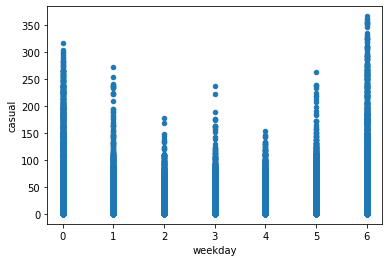

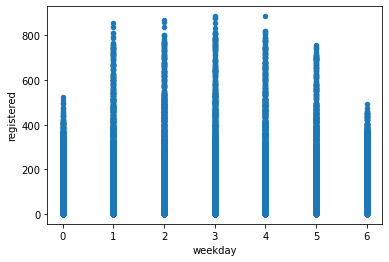

In [ ]:
df.plot(kind='scatter', x='weekday', y='casual')
df.plot(kind='scatter', x='weekday', y='registered')

In [ ]:
#we can see that there are more registered users using ebikes throughout the week, but what about the hour. which hour has the most uses for registered users?
df.loc[:, ["count", "registered", "hour"]]

count  registered  hour
0         16          13     0
1         40          32     1
2         32          27     2
3         13          10     3
4          1           1     4
...      ...         ...   ...
17374    119         108    19
17375     89          81    20
17376     90          83    21
17377     61          48    22
17378     49          37    23

[17379 rows x 3 columns]

<AxesSubplot:xlabel='hour', ylabel='registered'>

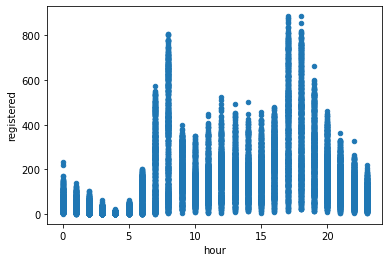

In [ ]:
df.plot(kind='scatter', x='hour', y='registered')

In [ ]:
#is there a difference between registered and casual users during the seasons?
df.loc[:, ["season", "count", "registered", "casual"]]

season  count  registered  casual
0           1     16          13       3
1           1     40          32       8
2           1     32          27       5
3           1     13          10       3
4           1      1           1       0
...       ...    ...         ...     ...
17374       1    119         108      11
17375       1     89          81       8
17376       1     90          83       7
17377       1     61          48      13
17378       1     49          37      12

[17379 rows x 4 columns]

<AxesSubplot:xlabel='season', ylabel='registered'>

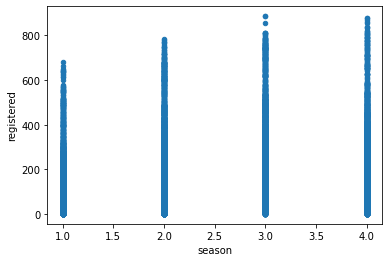

In [ ]:
df.plot(kind='scatter', x='season', y='registered')

<AxesSubplot:xlabel='season', ylabel='casual'>

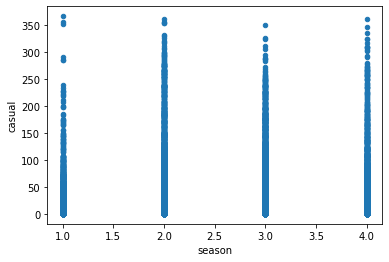

In [ ]:
df.plot(kind='scatter', x='season', y='casual')

In [ ]:
df.to_csv('bike_dataset_edited.csv')